# My Beatiful Multilayer Perceptron
## Rafael Mateus Carrion

After hours of stubbornness and brute force, with no result. I present to you my one and only perfected Mulilayer Perceptron :) 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sampling import random_pick
from activation_functions import sigmoid, sigmoid_derivative

In [2]:
def layer_sizes(X, hidden_size, Y):
    """ Determines the number of nodes in each layer of the neural network
    Arguments:
    X -- input dataset
    hidden_size -- size of the hidden layer
    Y -- labels

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = hidden_size
    n_y = Y.shape[0]

    return n_x, n_h, n_y

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    """Initializes parameters to build a neural network with n_h hidden units and n_y outputs.
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- dictionary containing weights:
        Wi -- weight matrix of input layer
        Wh -- weight matrix of hidden layer
        Wo -- weight matrix of output layer
    """
    Wi = np.random.randn(n_x, n_x)
    Wh = np.random.randn(n_h, n_x)
    Wo = np.random.randn(n_y, n_h)

    parameters = {
        "Wi": Wi,
        "Wh": Wh,
        "Wo": Wo
        }

    return parameters

In [4]:
def forward_propagation(X, parameters):
    """Forward propagation for the neural network.

    Arguments:
    X -- input data of size (m, n_x)
    parameters -- dictionary containing weights

    Returns:
    Yo -- sigmoid activation of the output layer
    cache -- a dictionary containing "Vi", "Vh", "Vo", "Ai", "Ah", "Ao"
    """
    # Retrieve each parameter from the dictionary
    Wi = parameters['Wi']
    Wh = parameters['Wh']
    Wo = parameters['Wo']

    # Local field for input layer
    Vi = np.dot(Wi, X.T)
    # Output of input layer after activation
    Yi = sigmoid(Vi)
    # Local field for hidden layer
    Vh = np.dot(Wh, Yi)
    # Output of hidden layer after activation
    Yh = sigmoid(Vh)
    # Local field for output layer
    Vo = np.dot(Wo, Yh)
    # Output of output layer after activation
    Yo = sigmoid(Vo)

    cache = {
        "Vi": Vi,
        "Yi": Yi,
        "Vh": Vh,
        "Yh": Yh,
        "Vo": Vo,
        "Yo": Yo
        }

    return Yo, cache

In [5]:
def backward_propagation(X, Y, parameters, cache, learning_rate):
    """Implement the backward propagation.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape
    Y -- "true" labels vector of shape

    Returns:
    grads -- python dictionary with gradients with respect to different parameters
    """
    # Retrieve weights
    Wi = parameters['Wi']
    Wh = parameters['Wh']
    Wo = parameters['Wo']

    # Retrieve from cache
    Yi = cache['Yi']
    Yh = cache['Yh']
    Yo = cache['Yo']
    Vi = cache['Vi']
    Vh = cache['Vh']
    Vo = cache['Vo']

    # Local gradient for output layer
    localgrad_o = np.multiply((Yo - Y), sigmoid_derivative(Vo))
    # Local gradient for hidden layer
    localgrad_h = np.multiply(localgrad_o, sigmoid_derivative(Vh)) * Wo
    # Local gradient for input layer
    localgrad_i = np.multiply(localgrad_h, sigmoid_derivative(Vi)) * Wh

    # Delta for weights of output layer
    delta_o = - learning_rate * np.dot(localgrad_o, Yh.T)
    # Delta for weights of hidden layer
    delta_h = - learning_rate * np.dot(localgrad_h, Yi)
    # Delta for weights of input layer
    delta_i = - learning_rate * np.dot(localgrad_i, X.T)

    # Update weights
    Wi = Wi + delta_i
    Wh = Wh + delta_h
    Wo = Wo + delta_o

    gradients = {
        'localgrad_i': localgrad_i,
        'localgrad_h': localgrad_h,
        'localgrad_o': localgrad_o
        }

    parameters = {
        'Wi': Wi,
        'Wh': Wh,
        'Wo': Wo
        }

    return gradients, parameters

In [6]:
def nn_model(X, Y, hidden_neurons, epochs, learning_rate, batch_size=1, verbose=False):
    """Neural Network model

    Arguments:
    X -- dataset of shape
    Y -- labels of shape
    hidden_neurons -- size of the hidden layer
    epochs -- number of iterations in gradient descent loop
    verbose -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    n_x, n_h, n_y = layer_sizes(X.T, hidden_neurons, Y)

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    gradients_input = []
    gradients_hidden = []
    gradients_output = []

    # Loop for number of epochs
    for epoch in range(epochs):
        errors = []
        gradients = pd.DataFrame(columns=['localgrad_i', 'localgrad_h', 'localgrad_o'])
        # Loop for each epoch
        for i in range(X.shape[0]):
            X_i = X[i].reshape((1, X[i].shape[0]))
            Y_i = Y[:, i]

            # Forward propagation
            y_preds, cache = forward_propagation(X_i, parameters)
            error = Y_i - y_preds
            errors.append(np.square(error))

            # Backward propagation
            grads, parameters = backward_propagation(X_i, Y_i, parameters, cache, learning_rate)
            gradients.loc[len(gradients)] = grads['localgrad_i'].mean(), grads['localgrad_h'].mean(), grads['localgrad_o'].mean()

        # Save all gradients
        gradients_input.append(gradients['localgrad_i'].mean())
        gradients_hidden.append(gradients['localgrad_h'].mean())
        gradients_output.append(gradients['localgrad_o'].mean())

        # Print the cost after each epoch
        if verbose:
            print(f'Epoch [{epoch+1}|{epochs}]:')
            print(f'  Loss: {1/2*np.sum(errors)}')

    return parameters, errors, gradients_input, gradients_hidden, gradients_output

# Data Preparation and Visualization

In [7]:
mat=scipy.io.loadmat('data/datosimulacionC.mat')
data=pd.DataFrame()

for i in list(mat.keys()-['__header__', '__version__', '__globals__']):
    data[i]=mat[i].reshape(-1)

data = data[['Xv', 'Xs', 'OD']]

In [8]:
# Normilize data hypercube [0, 1]
data['Xv'] = data['Xv'].apply(lambda x: x/max(data['Xv']))
data['Xs'] = data['Xs'].apply(lambda x: x/max(data['Xs']))
data['OD'] = data['OD'].apply(lambda x: x/max(data['OD']))

In [9]:
# Plot normalized data
fig = px.scatter_3d(data, x='Xv', y='Xs', z='OD', color='OD',
                    title='Normalized data', width=600, height=450)
fig.show()

In [10]:
# split data into train and test
train, validate, test = random_pick(data, 0.6, 0.2, 'beta')

In [11]:
data['set'] = ''
data.loc[train.index.values, 'set'] = 'train'
data.loc[validate.index.values, 'set'] = 'validate'
data.loc[test.index.values, 'set'] = 'test'

In [12]:
# Plot split data
fig = px.scatter_3d(data, x='Xv', y='Xs', z='OD', color='set',
                    title='Train-test-validate data', width=600, height=450)
fig.show()


In [13]:
# change data from df to array
X_train = train[['Xv', 'Xs']].values
Y_train = train['OD'].values.reshape(1, -1)
X_validate = validate[['Xv', 'Xs']].values
Y_validate = validate['OD'].values.reshape(1, -1)
X_test = test[['Xv', 'Xs']].values
Y_test = test['OD'].values.reshape(1, -1)

# Partial Results 1 Epoch

In [14]:
trained_parameters, loss, gradients_input, gradients_hidden, gradients_output = nn_model(X_train, Y_train, hidden_neurons=2, epochs=2, learning_rate=1, verbose=True)

Epoch [1|2]:
  Loss: 1.8420954611525286
Epoch [2|2]:
  Loss: 1.3682213155532177


In [15]:
gradients_input


[3.141650645692966e-05, 2.3869080988474174e-06]

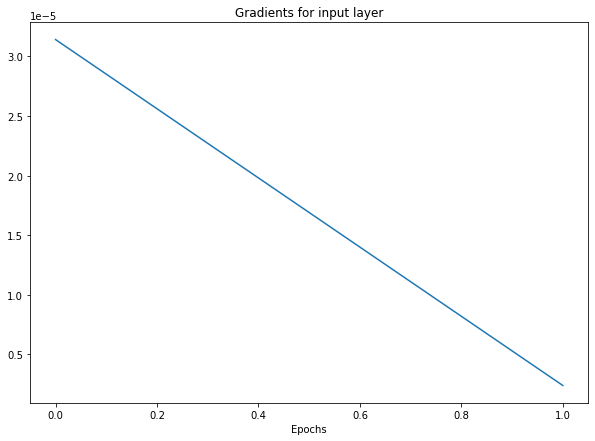

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(gradients_input, label='input')
plt.title('Gradients for input layer')
plt.xlabel('Epochs')
plt.show();

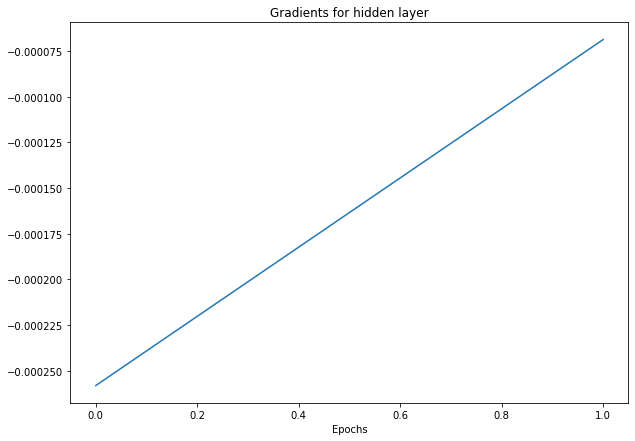

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(gradients_hidden, label='hidden')
plt.title('Gradients for hidden layer')
plt.xlabel('Epochs')
plt.show();

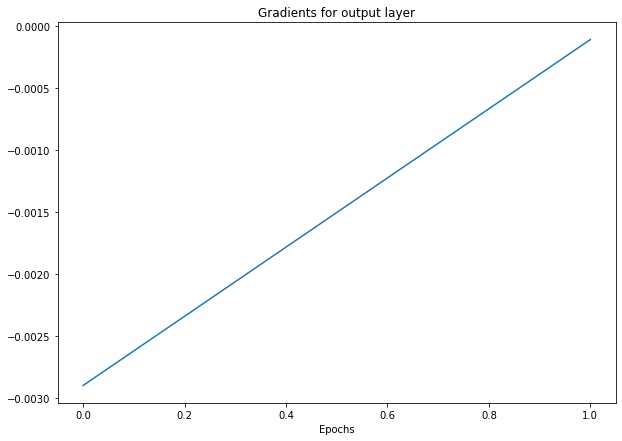

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(gradients_output, label='output')
plt.title('Gradients for output layer')
plt.xlabel('Epochs')
plt.show();

In [19]:
# Complete Results: Training in 10 Epochs

In [20]:
trained_parameters, loss, gradients_input, gradients_hidden, gradients_output = nn_model(X_train, Y_train, hidden_neurons=2, epochs=10, learning_rate=1, verbose=True)

Epoch [1|10]:
  Loss: 1.2847937195285284
Epoch [2|10]:
  Loss: 0.9217115357300054
Epoch [3|10]:
  Loss: 0.8305897632695124
Epoch [4|10]:
  Loss: 0.7706319130776059
Epoch [5|10]:
  Loss: 0.7266957110442172
Epoch [6|10]:
  Loss: 0.6915389702265982
Epoch [7|10]:
  Loss: 0.6615537860250797
Epoch [8|10]:
  Loss: 0.63489344759379
Epoch [9|10]:
  Loss: 0.6105959167473427
Epoch [10|10]:
  Loss: 0.5881513697436453


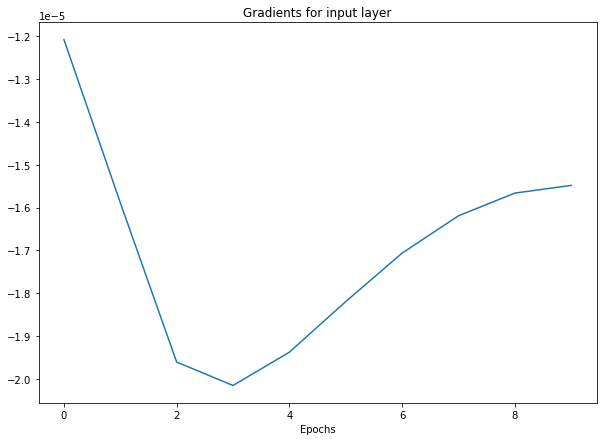

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(gradients_input, label='input')
plt.title('Gradients for input layer')
plt.xlabel('Epochs')
plt.show();

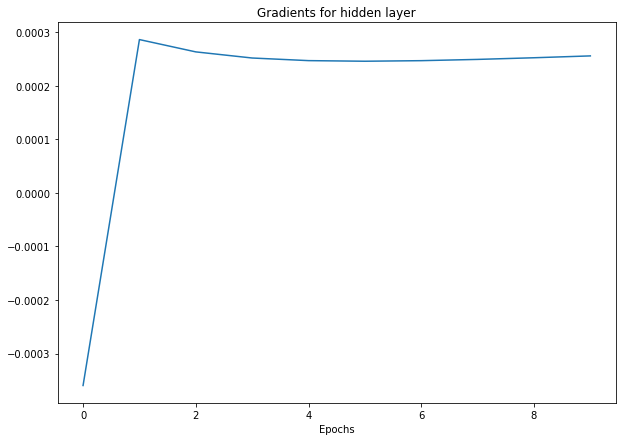

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(gradients_hidden, label='hidden')
plt.title('Gradients for hidden layer')
plt.xlabel('Epochs')
plt.show();

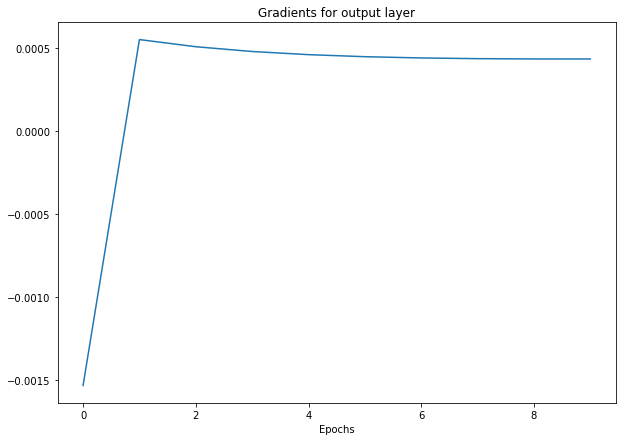

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(gradients_output, label='output')
plt.title('Gradients for output layer')
plt.xlabel('Epochs')
plt.show();

# Making Predictions on Test Data

In [28]:
# Let's make predictions on the test set
y_preds, _ = forward_propagation(X_test, trained_parameters)

test['y_preds'] = y_preds.T

In [32]:
# Plot split data
fig = px.scatter_3d(test, x='Xv', y='Xs', z='OD', color='OD',
                    title='Real Test Data', width=600, height=450)
fig.show()


In [33]:
# Plot split data
fig = px.scatter_3d(test, x='Xv', y='Xs', z='y_preds', color='y_preds',
                    title='Predicted Test Data', width=600, height=450)
fig.show()


# Questions

### Does the MLP learn?
Yes it learns. As we can see in the plots of the local gradients, they change over the epochs (maybe not too fast) which means the machine is actually learning. Also if we analyze the loss function (printed on the training) we can see it also decreases over epochs. However, it is evident that it gets stuck after a few epochs, this means, the machine can not learn much more as it is, maybe changing activations or losses could help, however it probably gets stuck because this machine does not account bias, which probably could help more than changing the model functions.

### Why the error is not zero?
